In [324]:
%run Modules_notebook.ipynb

# Load Dataset

In [325]:
raw_data = pd.read_csv("mtsamples.csv")
target_class = "medical_specialty"
columns_to_consider = ["transcription"]

In [326]:
raw_data.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


# Percentage of null values 

In [327]:
percent_null_values(raw_data)

,column_name,percent_missing
0,Unnamed: 0,0.000000
1,description,0.000000
2,medical_specialty,0.000000
3,sample_name,0.000000
4,transcription,0.660132
5,keywords,21.364273


In [328]:
raw_data = raw_data[raw_data['transcription'].notna()]
data_categories  = raw_data.groupby(raw_data['medical_specialty'])

categories_dict = {}
for catName,dataCategory in data_categories:
    categories_dict[catName] = len(dataCategory)

# Plotting top 10 categories

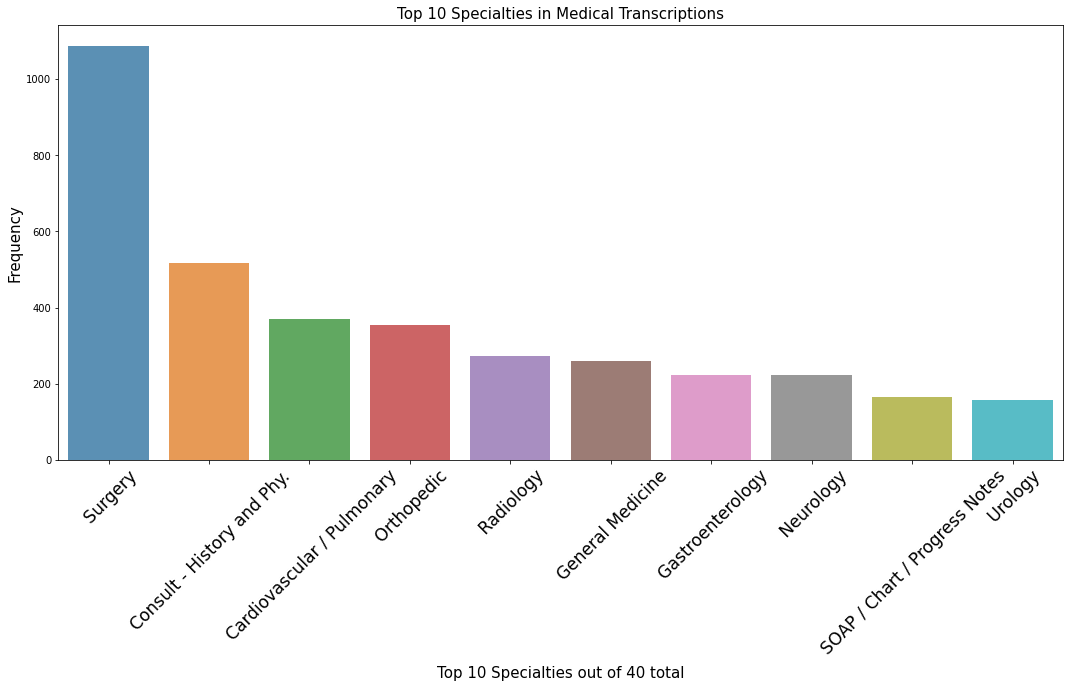

In [329]:
plot_top_ten_categories(raw_data)

#### Medical specialities sorted based on their frequency 

In [330]:
sorted(categories_dict.items(), key=lambda x:x[1], reverse=True)

[(' Surgery', 1088),
 (' Consult - History and Phy.', 516),
 (' Cardiovascular / Pulmonary', 371),
 (' Orthopedic', 355),
 (' Radiology', 273),
 (' General Medicine', 259),
 (' Gastroenterology', 224),
 (' Neurology', 223),
 (' SOAP / Chart / Progress Notes', 166),
 (' Urology', 156),
 (' Obstetrics / Gynecology', 155),
 (' Discharge Summary', 108),
 (' ENT - Otolaryngology', 96),
 (' Neurosurgery', 94),
 (' Hematology - Oncology', 90),
 (' Ophthalmology', 83),
 (' Nephrology', 81),
 (' Emergency Room Reports', 75),
 (' Pediatrics - Neonatal', 70),
 (' Pain Management', 61),
 (' Psychiatry / Psychology', 53),
 (' Office Notes', 50),
 (' Podiatry', 47),
 (' Dermatology', 29),
 (' Cosmetic / Plastic Surgery', 27),
 (' Dentistry', 27),
 (' Letters', 23),
 (' Physical Medicine - Rehab', 21),
 (' Sleep Medicine', 20),
 (' Endocrinology', 19),
 (' Bariatrics', 18),
 (' IME-QME-Work Comp etc.', 16),
 (' Chiropractic', 14),
 (' Diets and Nutritions', 10),
 (' Rheumatology', 10),
 (' Speech - L

# Taking top 3 classes 

In [392]:
TOTAL_CLASSES = 3
selected_categories = sorted(categories_dict.items(), key=lambda x:x[1], reverse=True)[:TOTAL_CLASSES]
filtered_data_categories = list(map(lambda x:x[0], selected_categories))
data = raw_data[['transcription', 'medical_specialty']]

In [393]:
selected_categories

[(' Surgery', 1088),
 (' Consult - History and Phy.', 516),
 (' Cardiovascular / Pulmonary', 371)]

In [394]:
type(selected_categories)

list

In [395]:
data = data.loc[data['medical_specialty'].isin(filtered_data_categories)]

In [396]:
data

,transcription,medical_specialty
3,"2-D M-MODE: , ,1. Left atrial enlargement wit...",Cardiovascular / Pulmonary
4,1. The left ventricular cavity size and wall ...,Cardiovascular / Pulmonary
7,"2-D ECHOCARDIOGRAM,Multiple views of the heart...",Cardiovascular / Pulmonary
9,"DESCRIPTION:,1. Normal cardiac chambers size....",Cardiovascular / Pulmonary
11,"2-D STUDY,1. Mild aortic stenosis, widely calc...",Cardiovascular / Pulmonary
...,...,...
4972,"INDICATION: , Chest pain.,TYPE OF TEST: , Aden...",Cardiovascular / Pulmonary
4973,"CHIEF COMPLAINT: , Chest pain.,HISTORY OF PRES...",Cardiovascular / Pulmonary
4974,"HISTORY OF PRESENT ILLNESS: , The patient is a...",Cardiovascular / Pulmonary
4975,"HISTORY OF PRESENT ILLNESS: , Mr. ABC is a 60-...",Cardiovascular / Pulmonary


In [397]:
transcription_list = data['transcription'].tolist()            

# Data Processing

In [398]:
#getting rid of targeted charachters in the trascription
chars = ['#',':,',': ,',';','$','!','?','*','``','1. ', '2. ', '3. ', '4. ', '5. ','6. ','7. ','8. ','9. ','10. ']
for c in chars:
    data['transcription'] = data['transcription'].str.replace(c,"")

#data.sample(5)

In [399]:
#getting rid of targeted charachters in the trascription
chars = [",", ".", "[", "]", ":", "``", ")", "(", "1", "2", "5", "%", "3", "4", "4-0", "3-0", "6", "''", "0", "2-0", "8", "7", "&", "5-0", "9", "0.5", "1.5", "500", "50", "100", "6-0", "15", "2.5", "14-15", "60", "'", "300", "14", "________", "7-0", "90", "__________", "3.5", "1:100,000", "70", "0.", "80", "1:50,000", "03/08/200 ", "03/09/2007", "25605", "7.314", "33.0", "855.", "08/22/03", "10/500", "125.", "144/6", '__', '___', '____', '_____', '______', '_______']
for c in chars:
    data['transcription'] = data['transcription'].str.replace(c," ")

#data.sample(5)

# Tokenization

In [400]:
import nltk
# Tokenizing 
from nltk.tokenize import word_tokenize

data['tokenized_sents'] = data['transcription'].apply(nltk.word_tokenize)
data.sample(5)

,transcription,medical_specialty,tokenized_sents
4794,PROCEDURE Flexible bronchoscopy PREOPERATIVE ...,Cardiovascular / Pulmonary,"[PROCEDURE, Flexible, bronchoscopy, PREOPERATI..."
286,PREOPERATIVE DIAGNOSES Thrombosed left forearm...,Surgery,"[PREOPERATIVE, DIAGNOSES, Thrombosed, left, fo..."
4301,CHIEF COMPLAINT Leaking nephrostomy tube H...,Consult - History and Phy.,"[CHIEF, COMPLAINT, Leaking, nephrostomy, tube,..."
4337,HISTORY OF PRESENT ILLNESS This is a -year-...,Consult - History and Phy.,"[HISTORY, OF, PRESENT, ILLNESS, This, is, a, -..."
1039,PREOPERATIVE DIAGNOSIS Acute acalculous chole...,Surgery,"[PREOPERATIVE, DIAGNOSIS, Acute, acalculous, c..."


# POS Tagging 

In [401]:
from nltk import pos_tag
data['POSTags'] = data['tokenized_sents'].apply(pos_tag)

# Selecting the nouns in our corpus

In [402]:
data['Nouns'] = data['POSTags'].apply(lambda x: [(t[0], t[1]) for t in x if t[1]=='NN' or t[1]=='NNP' or t[1]=='NNS' or t[1]=='NNPS'])

data['Nouns'].head()

3     [(M-MODE, NNP), (Left, NNP), (enlargement, NN)...
4     [(left, NN), (cavity, NN), (size, NN), (wall, ...
7     [(ECHOCARDIOGRAM, NNP), (Multiple, NNP), (view...
9     [(DESCRIPTION, NNP), (Normal, NNP), (chambers,...
11    [(-D, NN), (STUDY, NNP), (Mild, NNP), (stenosi...
Name: Nouns, dtype: object

# Lemmatizing the nouns

In [403]:
to_be_lemmatized = []

for nouns_per_medical_specialties in data['Nouns']:
    
    
    words2lemmatied = []
    for word in nouns_per_medical_specialties:
        words2lemmatied.append(word[0])
    
    to_be_lemmatized.append(words2lemmatied)


data['to_be_lemmatized'] = to_be_lemmatized
data['to_be_lemmatized'].head()

3     [M-MODE, Left, enlargement, diameter, cm, Norm...
4     [left, cavity, size, wall, thickness, wall, mo...
7     [ECHOCARDIOGRAM, Multiple, views, heart, vesse...
9     [DESCRIPTION, Normal, chambers, size, Normal, ...
11    [-D, STUDY, Mild, stenosis, Mild, hypertrophy,...
Name: to_be_lemmatized, dtype: object

In [404]:
data['transcription'] = data['to_be_lemmatized'].astype(str).apply(lemmatize_text)

In [405]:
data['transcription'] = data['transcription'].apply(lambda x: str(x))

In [406]:
#data['transcription'] = data['transcription'].apply(lemmatize_text)
data['transcription'] = data['transcription'].apply(clean_text)
print('Sample Transcription 3:'+data.iloc[1000]['transcription'])

Sample Transcription 3: preoperative   diagnosis   basal   cell   carcinoma   biopsy   postoperative   diagnosis   basal   cell   carcinoma   biopsy   operation   performed   excision   tip   basal   carcinoma   total   area   excision   section   margins   indication    a   yearold   female   excision   basal   cell   carcinoma   area   discussions   types   closure   summary   patient   or   condition   supine   or   table   underwent   anesthesia   marcaine   tip   areas   excision   area   prep   drape   marcaine   adrenaline   specimen   pathology   margins    o   clock   margin   margins   closure   advancement   closure   removal   difficulty   closure   monocryl   nylon   xeroform   gauze   pressure   steristrips   patient   minocycline   darvocetn   note   mm   loupe   magnification   procedure   no   complications   margins   termination   closure   technique  


In [407]:
data

,transcription,medical_specialty,tokenized_sents,POSTags,Nouns,to_be_lemmatized
3,mmode left enlargement diameter cm ...,Cardiovascular / Pulmonary,"[-D, M-MODE, Left, atrial, enlargement, with, ...","[(-D, JJ), (M-MODE, NNP), (Left, NNP), (atrial...","[(M-MODE, NNP), (Left, NNP), (enlargement, NN)...","[M-MODE, Left, enlargement, diameter, cm, Norm..."
4,left cavity size wall thickness wal...,Cardiovascular / Pulmonary,"[The, left, ventricular, cavity, size, and, wa...","[(The, DT), (left, NN), (ventricular, JJ), (ca...","[(left, NN), (cavity, NN), (size, NN), (wall, ...","[left, cavity, size, wall, thickness, wall, mo..."
7,echocardiogram multiple views heart v...,Cardiovascular / Pulmonary,"[-D, ECHOCARDIOGRAM, Multiple, views, of, the,...","[(-D, JJ), (ECHOCARDIOGRAM, NNP), (Multiple, N...","[(ECHOCARDIOGRAM, NNP), (Multiple, NNP), (view...","[ECHOCARDIOGRAM, Multiple, views, heart, vesse..."
9,description normal chambers size norm...,Cardiovascular / Pulmonary,"[DESCRIPTION, Normal, cardiac, chambers, size,...","[(DESCRIPTION, NNP), (Normal, NNP), (cardiac, ...","[(DESCRIPTION, NNP), (Normal, NNP), (chambers,...","[DESCRIPTION, Normal, chambers, size, Normal, ..."
11,d study mild stenosis mild hypertro...,Cardiovascular / Pulmonary,"[-D, STUDY, Mild, aortic, stenosis, widely, ca...","[(-D, NN), (STUDY, NNP), (Mild, NNP), (aortic,...","[(-D, NN), (STUDY, NNP), (Mild, NNP), (stenosi...","[-D, STUDY, Mild, stenosis, Mild, hypertrophy,..."
...,...,...,...,...,...,...
4972,indication chest pain type of test ...,Cardiovascular / Pulmonary,"[INDICATION, Chest, pain, TYPE, OF, TEST, Aden...","[(INDICATION, NNP), (Chest, NNP), (pain, NN), ...","[(INDICATION, NNP), (Chest, NNP), (pain, NN), ...","[INDICATION, Chest, pain, TYPE, OF, TEST, Aden..."
4973,chief complaint chest pain history ...,Cardiovascular / Pulmonary,"[CHIEF, COMPLAINT, Chest, pain, HISTORY, OF, P...","[(CHIEF, NNP), (COMPLAINT, NNP), (Chest, NNP),...","[(CHIEF, NNP), (COMPLAINT, NNP), (Chest, NNP),...","[CHIEF, COMPLAINT, Chest, pain, HISTORY, OF, P..."
4974,history of present illness patient ...,Cardiovascular / Pulmonary,"[HISTORY, OF, PRESENT, ILLNESS, The, patient, ...","[(HISTORY, NN), (OF, NNP), (PRESENT, NNP), (IL...","[(HISTORY, NN), (OF, NNP), (PRESENT, NNP), (IL...","[HISTORY, OF, PRESENT, ILLNESS, patient, woman..."
4975,history of present illness mr abc ...,Cardiovascular / Pulmonary,"[HISTORY, OF, PRESENT, ILLNESS, Mr, ABC, is, a...","[(HISTORY, NN), (OF, NNP), (PRESENT, NNP), (IL...","[(HISTORY, NN), (OF, NNP), (PRESENT, NNP), (IL...","[HISTORY, OF, PRESENT, ILLNESS, Mr, ABC, gentl..."


In [408]:
print('Sample Transcription 3:'+data.iloc[999]['transcription'])

Sample Transcription 3: diagnosis   extremely   basal   cell   carcinoma   postoperative   diagnosis   extremely   basal   cell   carcinoma   title   of   operation   excision   basal   cell   carcinoma   lid   dorsal   conjunctival   flap   lid   skin   graft   procedure   patient   operating   room   fashion   xylocaine   epinephrine   conjunctiva   skin   lid   conjunctiva   skin   nerve   block   upper   agent   preauricular   region   donor   graft   area   pen   margins   bardparker   blade   incision   nasal   margins   lesion   incision   scissors   muscle   conjunctiva   specimen   section   bleeding   cautery   upper   lid   incision   mm   margin   bardparker   blade   length   incision   orbicularis   steven   scissors   tarsus   vertical   cuts   dorsal   conjunctival   flap   conjunctiva   defect   lid   vicryl   defect   skin   preauricular   graft   region   defect   prolene   sutures   preauricular   graft   place   silk   border   graft   lid   incision   line   super

# Vectorization for only nouns

In [409]:
feature_names, tfIdfMat, vectorizer = vectorization(data)

In [410]:
feature_names

['abdomen',
 'abdominal',
 'abnormalities',
 'abnormality',
 'abscess',
 'abuse',
 'access',
 'accident',
 'ace',
 'activities',
 'activity',
 'acute',
 'addition',
 'adhesions',
 'admission',
 'affect',
 'age',
 'air',
 'airway',
 'alcohol',
 'alert',
 'alignment',
 'allergies',
 'alternatives',
 'amounts',
 'analysis',
 'anastomosis',
 'anatomy',
 'anemia',
 'anesthesia',
 'anesthetic',
 'aneurysm',
 'angiogram',
 'angiography',
 'angioplasty',
 'angle',
 'ankle',
 'anterior',
 'antibiotics',
 'anticoagulation',
 'anxiety',
 'aorta',
 'ap',
 'apex',
 'apnea',
 'appearance',
 'appendix',
 'appointment',
 'approach',
 'arch',
 'area',
 'areas',
 'arm',
 'arteries',
 'artery',
 'arthritis',
 'aspect',
 'aspiration',
 'aspirin',
 'assessment',
 'atrial',
 'atrium',
 'attachments',
 'attempt',
 'attention',
 'auscultation',
 'axis',
 'baby',
 'bag',
 'balloon',
 'bandage',
 'base',
 'basis',
 'beats',
 'bed',
 'benefits',
 'benign',
 'betadine',
 'bifurcation',
 'bilateral',
 'biopsies',


# Lemmatizing the list of nouns

In [411]:
lemmas = lemmatize_words(feature_names)

# Spell check 

In [412]:
import spacy

nlp = spacy.load("en_core_web_sm")

def get_is_oov(token):
    return token.text not in nlp.vocab

spacy.tokens.Token.set_extension("is_oov", getter=get_is_oov,force=True)

corrected_text_list = []
for text in lemmas:
    doc = nlp(text)
    corrected_text = [token.text if not token._.is_oov else token._.spell_suggestions[0] for token in doc]
    corrected_text_list.append(" ".join(corrected_text))



# Removing duplicates 

In [413]:
final_list = remove_duplicates(corrected_text_list)

# Vectorization for the corrected and lemmatized list of nouns

In [414]:
final_features, tfIdfMat, vectorizer = vectorization(data, final_list=final_list)


In [415]:
final_features

['appointment',
 'seizure',
 'hematocrit',
 'vein',
 'limit',
 'year',
 'health',
 'cord',
 'physical',
 'abnormality',
 'stroke',
 'obtuse',
 'size',
 'exposure',
 'appraisal',
 'recurrence',
 'guidance',
 'strength',
 'treatment',
 'infusion',
 'consistent',
 'Mister',
 'husband',
 'body',
 'usher',
 'rotator',
 'surface',
 'pain',
 'affect',
 'flap',
 'prophylaxis',
 'resistance',
 'acute_accent',
 'state',
 'water',
 'accident',
 'palate',
 'point',
 'air',
 'soft',
 'unit_of_measurement',
 'secretion',
 'osteotomy',
 'chamber',
 'monocryl',
 'basic',
 'patella',
 'direction',
 'failure',
 'significant',
 'cough',
 'structure',
 'air_passage',
 'branch',
 'general',
 'forearm',
 'stress',
 'pin',
 'tone',
 'supine',
 'palpitation',
 'instrumentality',
 'past',
 'anesthetic',
 'cartridge_holder',
 'endoscopy',
 'episode',
 'position',
 'electrocautery',
 'ventricular',
 'infection',
 'ap',
 'hepatosplenomegaly',
 'Reconstruction',
 'occlusion',
 'lumen',
 'surgery',
 'perforation',


In [416]:
len(final_features)

877

# Cosine Similarity

In [417]:
similarity_threshold = 0.5
ndigits = 3
results_df = find_similar(final_features, similarity_threshold, ndigits)
#print(results_df)

In [418]:
results_df.sort_values(by='similarity_score', ascending=False)

,full_name,comparison_name,similarity_score
12360,tone,note,1.0
8866,secretion,resection,1.0
43997,post,spot,1.0
56269,uterus,suture,1.0
21587,rate,tear,1.0
...,...,...,...
49497,hernia,inform,0.5
1006,vein,expulsion,0.5
17709,female,center,0.5
49495,hernia,kerlix,0.5


# Jaccard similarity

In [419]:
similar_elements = jaccard_similarity(final_features, threshold=0.7)
print(similar_elements)

[('appointment', 'perforation', 0.7), ('appointment', 'peritoneum', 0.7), ('appointment', 'pneumonia', 0.7777777777777778), ('appointment', 'intraoperative', 0.7), ('appointment', 'improvement', 0.7), ('appointment', 'compaction', 0.7777777777777778), ('appointment', 'preparation', 0.7777777777777778), ('appointment', 'complication', 0.7), ('appointment', 'compartment', 0.7), ('appointment', 'respiration', 0.7), ('appointment', 'attention', 0.75), ('appointment', 'interpolation', 0.7), ('appointment', 'outpatient', 0.7777777777777778), ('appointment', 'operation', 0.7777777777777778), ('appointment', 'presentation', 0.7), ('appointment', 'acetaminophen', 0.8), ('appointment', 'exploitation', 0.7), ('appointment', 'implantation', 0.7777777777777778), ('appointment', 'impregnation', 0.8), ('appointment', 'examination', 0.7777777777777778), ('appointment', 'completion', 0.7), ('hematocrit', 'hematuria', 0.7), ('hematocrit', 'echocardiogram', 0.7272727272727273), ('hematocrit', 'chemothera

In [420]:
df = pd.DataFrame(similar_elements, columns=['word1','word2','similarity_score']) 

In [421]:
df

,word1,word2,similarity_score
0,appointment,perforation,0.700000
1,appointment,peritoneum,0.700000
2,appointment,pneumonia,0.777778
3,appointment,intraoperative,0.700000
4,appointment,improvement,0.700000
...,...,...,...
1399,atrial,critical,0.833333
1400,auscultation,nasal_consonant,0.700000
1401,gilbert,bilateral,0.750000
1402,bilateral,alert,0.714286


In [422]:
df.to_excel('jacard_similarity_new.xlsx')

In [423]:
import gc
gc.collect()
tfIdfMatrix = tfIdfMat.todense()
labels = data['medical_specialty'].tolist()

# Limit the number of unique values in labels to 21
unique_labels = list(set(labels))[:21]

tsne_results = TSNE(n_components=2, init='random', random_state=0, perplexity=40).fit_transform(tfIdfMatrix)
plt.figure(figsize=(16, 10))
palette = sns.hls_palette(21, l=.6, s=.9)
sns.scatterplot(
    x=tsne_results[:, 0], y=tsne_results[:, 1],
    hue=labels,
    palette=palette,
    legend="full",
    alpha=0.3
)
plt.show()


ValueError: The palette list has the wrong number of colors.

<Figure size 1152x720 with 0 Axes>

# Wordcloud

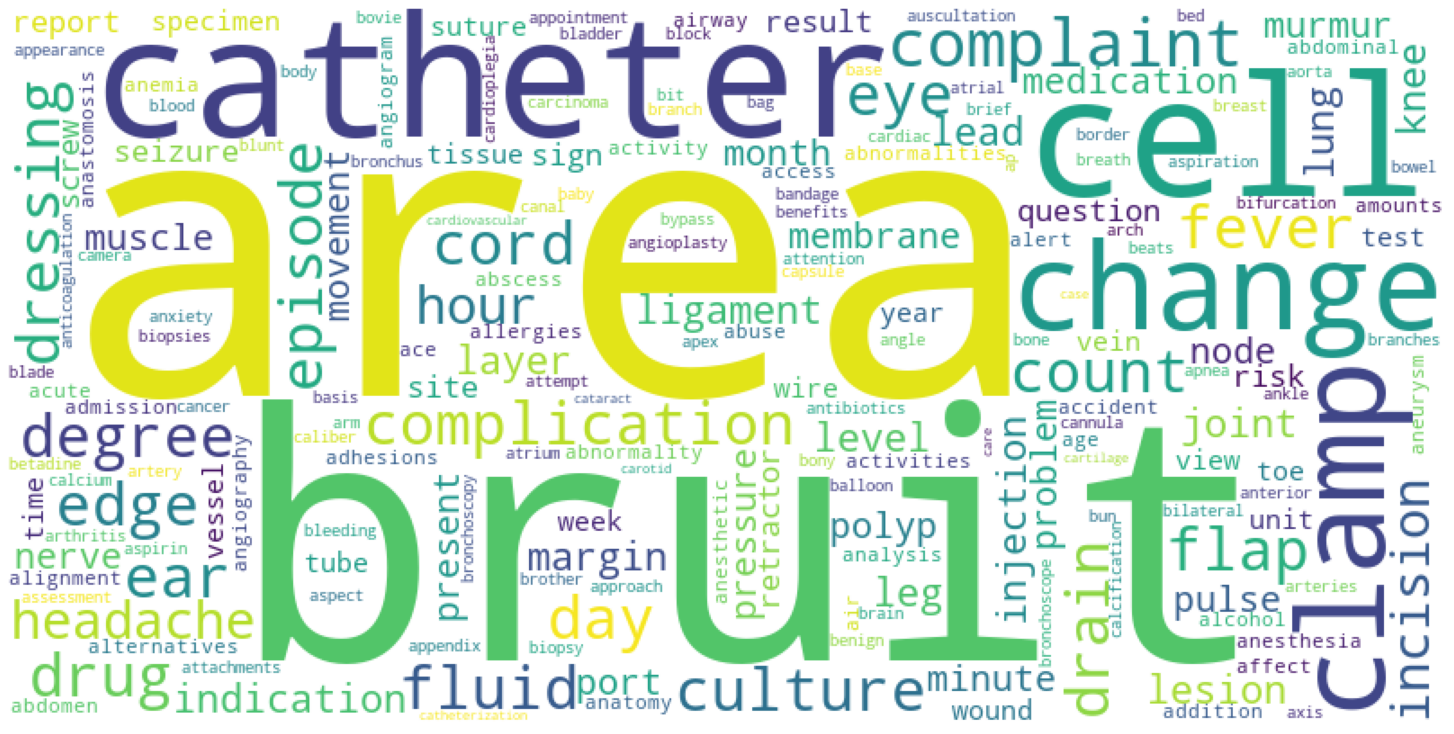

In [424]:
########### Word cloud visualisation ##############
for_wordcloud = feature_names
for_wordcloud = for_wordcloud
for_wordcloud_str = ' '.join(for_wordcloud)

wordcloud = WordCloud( width=800, height=400, background_color ='white',
                      min_font_size = 7).generate(for_wordcloud_str)

plt.figure(figsize=(20, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
 
plt.show()

# Forward Feature selection and under sampling 

In [452]:
logistic_regression_params = {"penalty":"elasticnet", "solver":"saga", "l1_ratio":0.5, "random_state":1}
lreg = LogisticRegression(**logistic_regression_params)
sfs1 = sfs(lreg, k_features=15, forward=True, verbose=2, scoring='accuracy', cv=5) ###Change number of features to 10 as increasing more than that does not increase the accuracy

In [453]:
labels = data['medical_specialty'].tolist() 

# instantiating the random undersampler
rus = RandomUnderSampler() 
# resampling X, y
X_rus, y_rus = rus.fit_resample(tfIdfMat.toarray(), labels)
print('X_Set_Size:'+str(X_rus.shape))
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.30, random_state=42)

sfs1 = sfs1.fit(X_train, y_train)

X_Set_Size:(1113, 1000)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   16.7s finished

[2023-09-22 19:21:49] Features: 1/15 -- score: 0.6072043010752688[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 999 out of 999 | elapsed:   17.6s finished

[2023-09-22 19:22:07] Features: 2/15 -- score: 0.6533664185277088[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 998 out of 998 | elapsed:   18.4s finished

[2023-09-22 19:22:25] Features: 3/15 -- score: 0.6854342431761786[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done

In [454]:
feat_names = list(sfs1.k_feature_names_)

# Top Features

In [455]:
for i in feat_names:
    print(feature_names[int(i)])

abnormalities
amounts
aspect
atrium
attempt
axis
branch
fat
hematocrit
lumbar
male
portal
pressures
proximal


IndexError: list index out of range

In [456]:
print('Train_Set_Size:'+str(X_train.shape))
print('Test_Set_Size:'+str(X_test.shape))

Train_Set_Size:(779, 1000)
Test_Set_Size:(334, 1000)


# Modelling

In [457]:
logistic_regression_params = {"penalty":"elasticnet", "solver":"saga", "l1_ratio":0.5, "random_state":1}
feat_cols = list(sfs1.k_feature_idx_)

y_test_pred, model = fit_logistic_regression(X_train[:, feat_cols], y_train, X_test[:, feat_cols], logistic_regression_params)

In [458]:
coefs = model.coef_

In [459]:
model.classes_

array([' Cardiovascular / Pulmonary', ' Consult - History and Phy.',
       ' Surgery'], dtype='<U27')

In [460]:
c = 0
class_1, class_2, class_3 = {}, {}, {}
for i in feat_names:
    # print(feature_names[int(i)], coefs[0][c])
    class_1[feature_names[int(i)]] = np.exp(coefs[0][c])
    class_2[feature_names[int(i)]] = np.exp(coefs[1][c])
    class_3[feature_names[int(i)]] = np.exp(coefs[2][c])
    c +=1
#source https://towardsdatascience.com/interpreting-coefficients-in-linear-and-logistic-regression-6ddf1295f6f1

IndexError: list index out of range

# Logistic Regression coefficients for features for the classes

In [461]:
sorted(class_3.items(), key=lambda x:x[1], reverse=True)

[('proximal', 178.18975605752053),
 ('pressures', 40.82249767690303),
 ('axis', 6.477782683247965),
 ('abnormalities', 1.0),
 ('aspect', 1.0),
 ('branch', 0.8671117774998947),
 ('attempt', 0.6276194143129273),
 ('lumbar', 0.5157370566270336),
 ('portal', 0.2826040914031244),
 ('male', 0.22525226454143332),
 ('atrium', 0.21373680257683372),
 ('fat', 0.12286184901352146),
 ('amounts', 0.04769839117214288),
 ('hematocrit', 0.030578595090849234)]

In [462]:
sorted(class_2.items(), key=lambda x:x[1], reverse=True)

[('amounts', 102.9472560658397),
 ('fat', 38.52073533195958),
 ('atrium', 15.553170742901418),
 ('branch', 5.030274237400215),
 ('abnormalities', 3.636316711085484),
 ('hematocrit', 1.0),
 ('portal', 1.0),
 ('axis', 0.9438331486537046),
 ('male', 0.8641340790181619),
 ('attempt', 0.6078387071537767),
 ('lumbar', 0.5004410549084284),
 ('pressures', 0.1114313222784341),
 ('aspect', 0.05699804699755184),
 ('proximal', 0.0007330173962316358)]

In [463]:
cardio_features = sorted(class_1.items(), key=lambda x:x[1], reverse=True)
cardio_features

[('hematocrit', 27.486508054812802),
 ('aspect', 19.225004435384715),
 ('male', 13.960608260206989),
 ('lumbar', 10.528817147202387),
 ('attempt', 7.123341660478397),
 ('portal', 5.759562566107916),
 ('proximal', 2.817583244948571),
 ('atrium', 0.8174680782950045),
 ('branch', 0.6230203524977446),
 ('abnormalities', 0.6183902382393429),
 ('pressures', 0.5973954583922242),
 ('fat', 0.5741923932411628),
 ('amounts', 0.5533991963366928),
 ('axis', 0.44447309575200794)]

# IDF Values

In [464]:
for i in range(len(cardio_features)):
    word = cardio_features[i][0]
    print(word, vectorizer.idf_[vectorizer.vocabulary_[word]])

hematocrit 4.158013079464499
aspect 2.9904079193094386
male 2.8111775550851563
lumbar 4.340334636258454
attempt 4.271341764771503
portal 5.187632496645658
proximal 4.122921759653229
atrium 4.312163759291758
branch 3.809706385196284
abnormalities 3.736799614388196
pressures 4.146178621817496
fat 4.399175136281388
amounts 4.258096538021482
axis 4.717628867399922


# Logistic Regression Confusion Matrix Heatmap

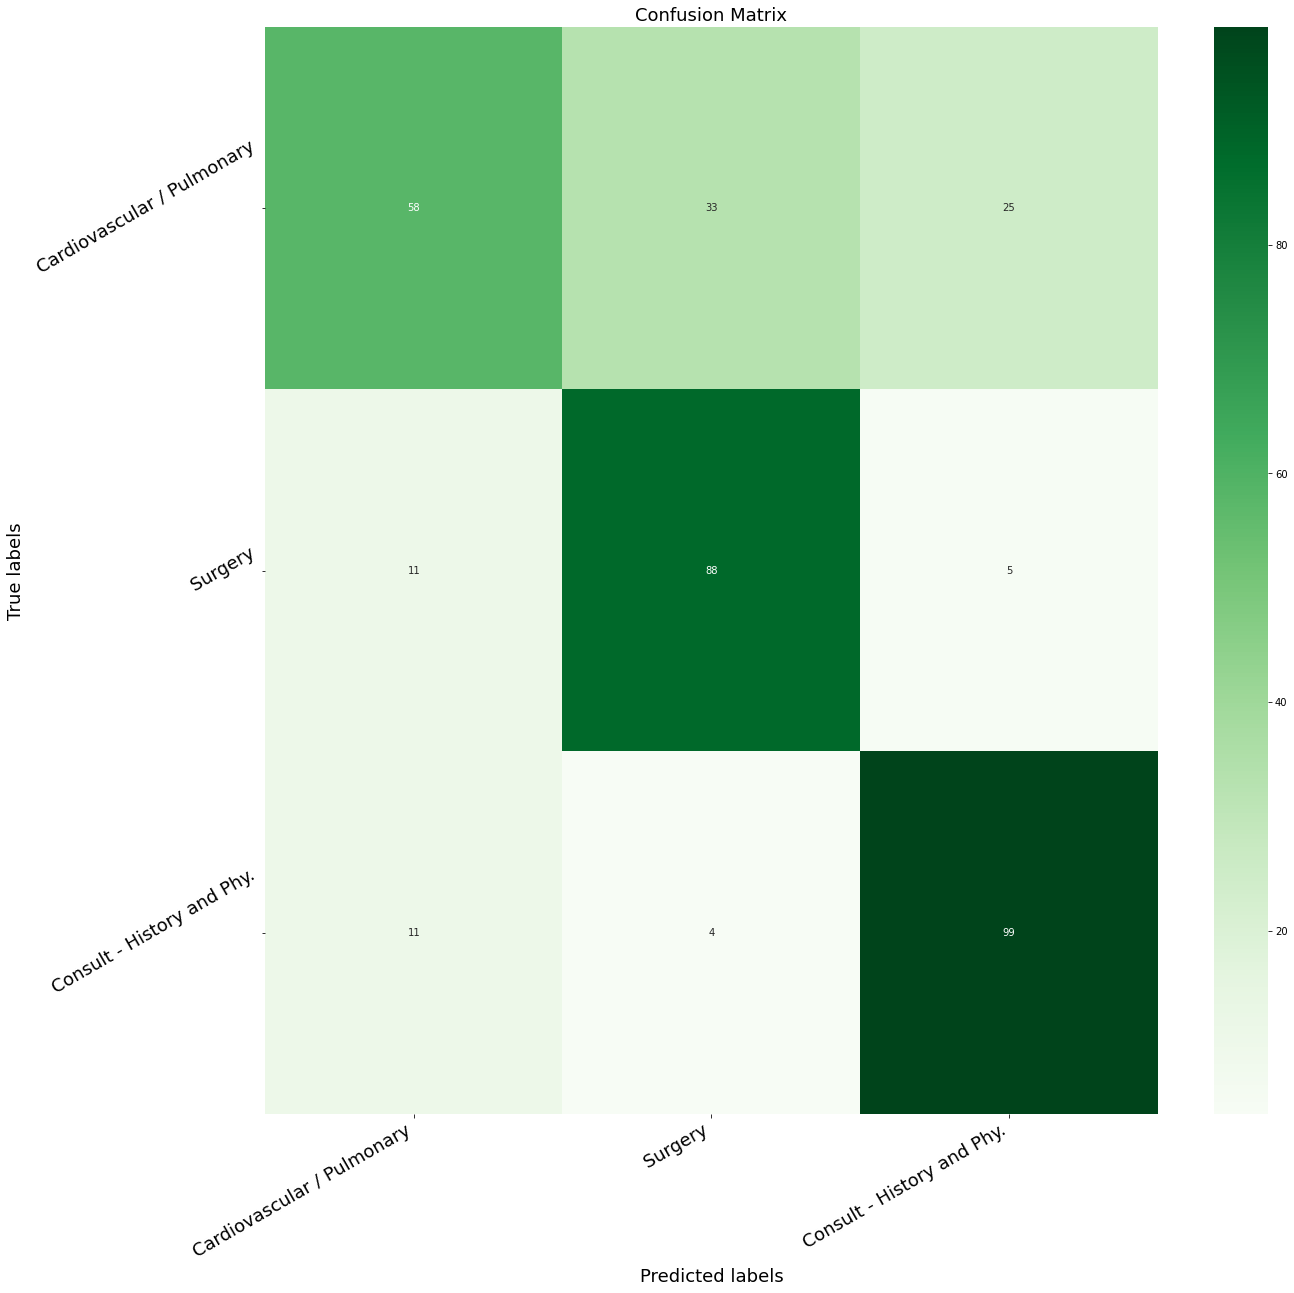

In [465]:
classes =  data['medical_specialty'].unique()
cm = confusion_matrix(y_test, y_test_pred, labels=classes)
plot_confusion_matrix(cm, classes)

# Logistic Regression Classification Report

In [466]:
print(classification_report(y_test,y_test_pred,labels=classes))

                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.72      0.50      0.59       116
                    Surgery       0.70      0.85      0.77       104
 Consult - History and Phy.       0.77      0.87      0.81       114

                   accuracy                           0.73       334
                  macro avg       0.73      0.74      0.73       334
               weighted avg       0.73      0.73      0.72       334



# SVM Modelling

In [440]:
svm_params = {'C': 1, 'gamma': 0.1, 'kernel': 'linear', 'random_state': 1}
feat_cols = list(sfs1.k_feature_idx_)
y_pred, model1 = svm_classification(X_train[:, feat_cols], y_train, X_test[:, feat_cols], y_test, svm_params)

# GridSearch for SVM

In [380]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': [0.1, 0.5, 1, 2, 5, 'scale', 'auto'],
    'random_state': [1]
}

# Create an SVM classifier object
svm_clf = svm.SVC()

# Create a GridSearchCV object
grid_search = GridSearchCV(svm_clf, param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Fitting 5 folds for each of 112 candidates, totalling 560 fits


KeyboardInterrupt: 

# SVM Confusion Matrix Heatmap 

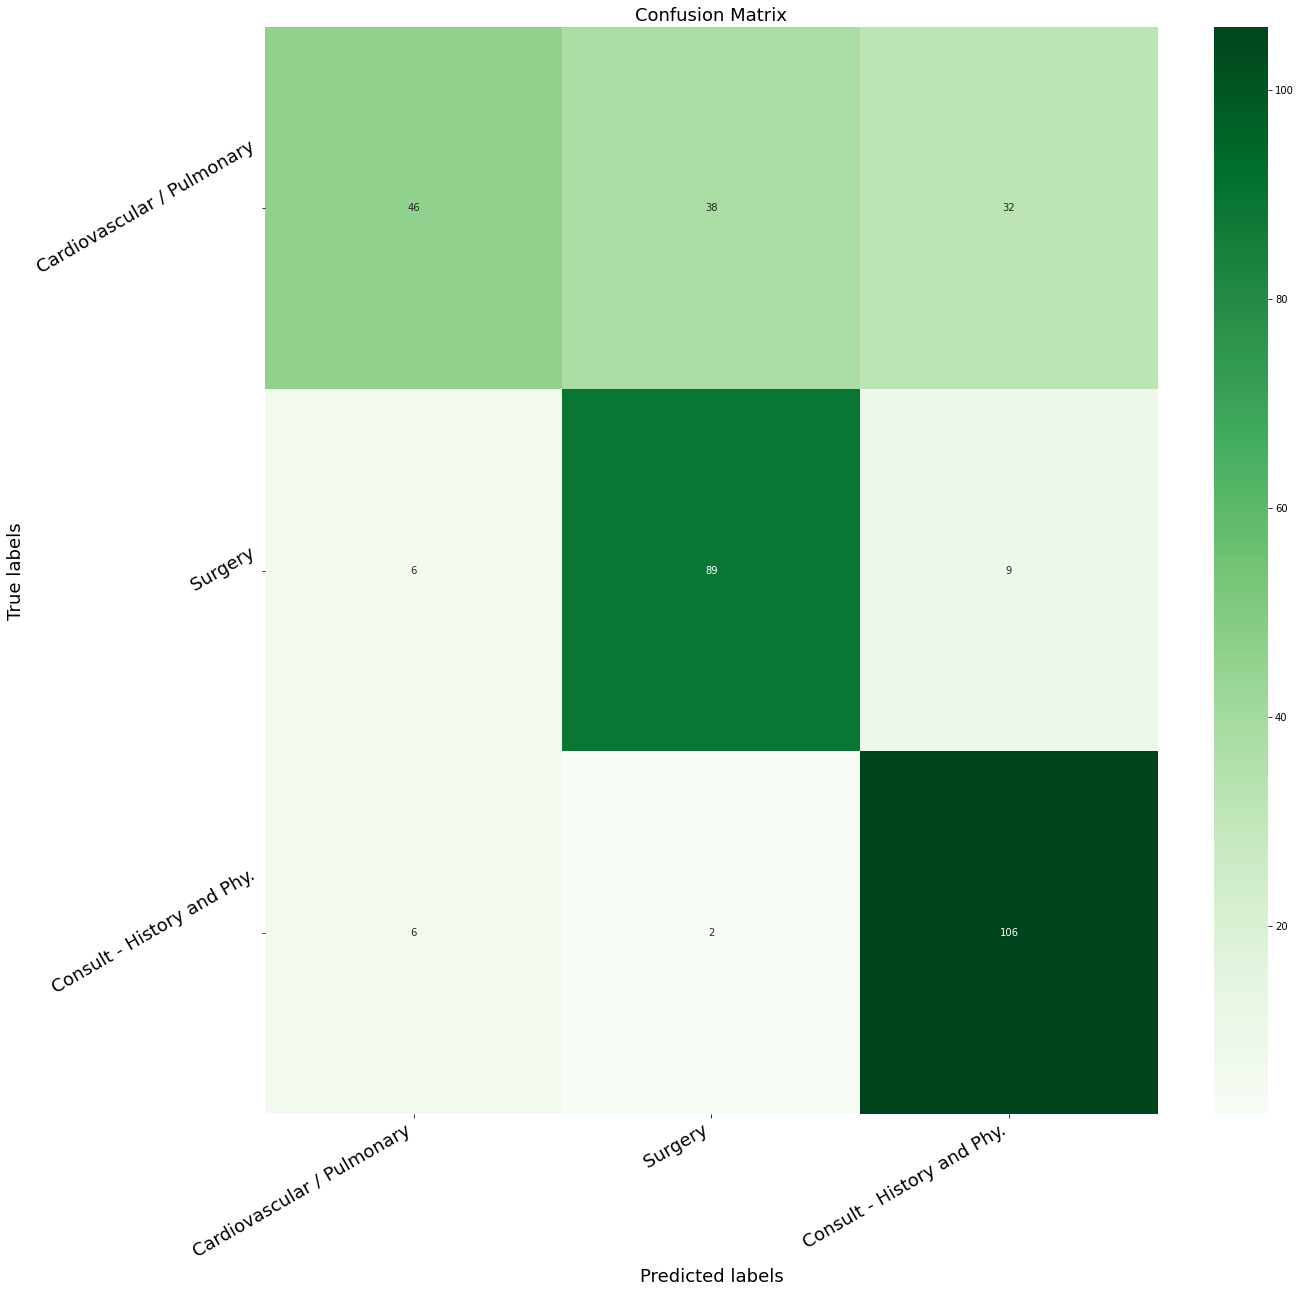

In [441]:
classes =  data['medical_specialty'].unique()
cm = confusion_matrix(y_test, y_pred, labels=classes)
plot_confusion_matrix(cm, classes)

# SVM Classification Report

In [442]:
print(classification_report(y_test,y_pred,labels=classes))

                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.79      0.40      0.53       116
                    Surgery       0.69      0.86      0.76       104
 Consult - History and Phy.       0.72      0.93      0.81       114

                   accuracy                           0.72       334
                  macro avg       0.73      0.73      0.70       334
               weighted avg       0.74      0.72      0.70       334



# GBT

In [443]:
gbdt_params = {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
feat_cols = list(sfs1.k_feature_idx_)
y_pred4, gbdt_clf = train_gbdt(X_train[:, feat_cols], y_train, X_test[:, feat_cols], y_test, gbdt_params)

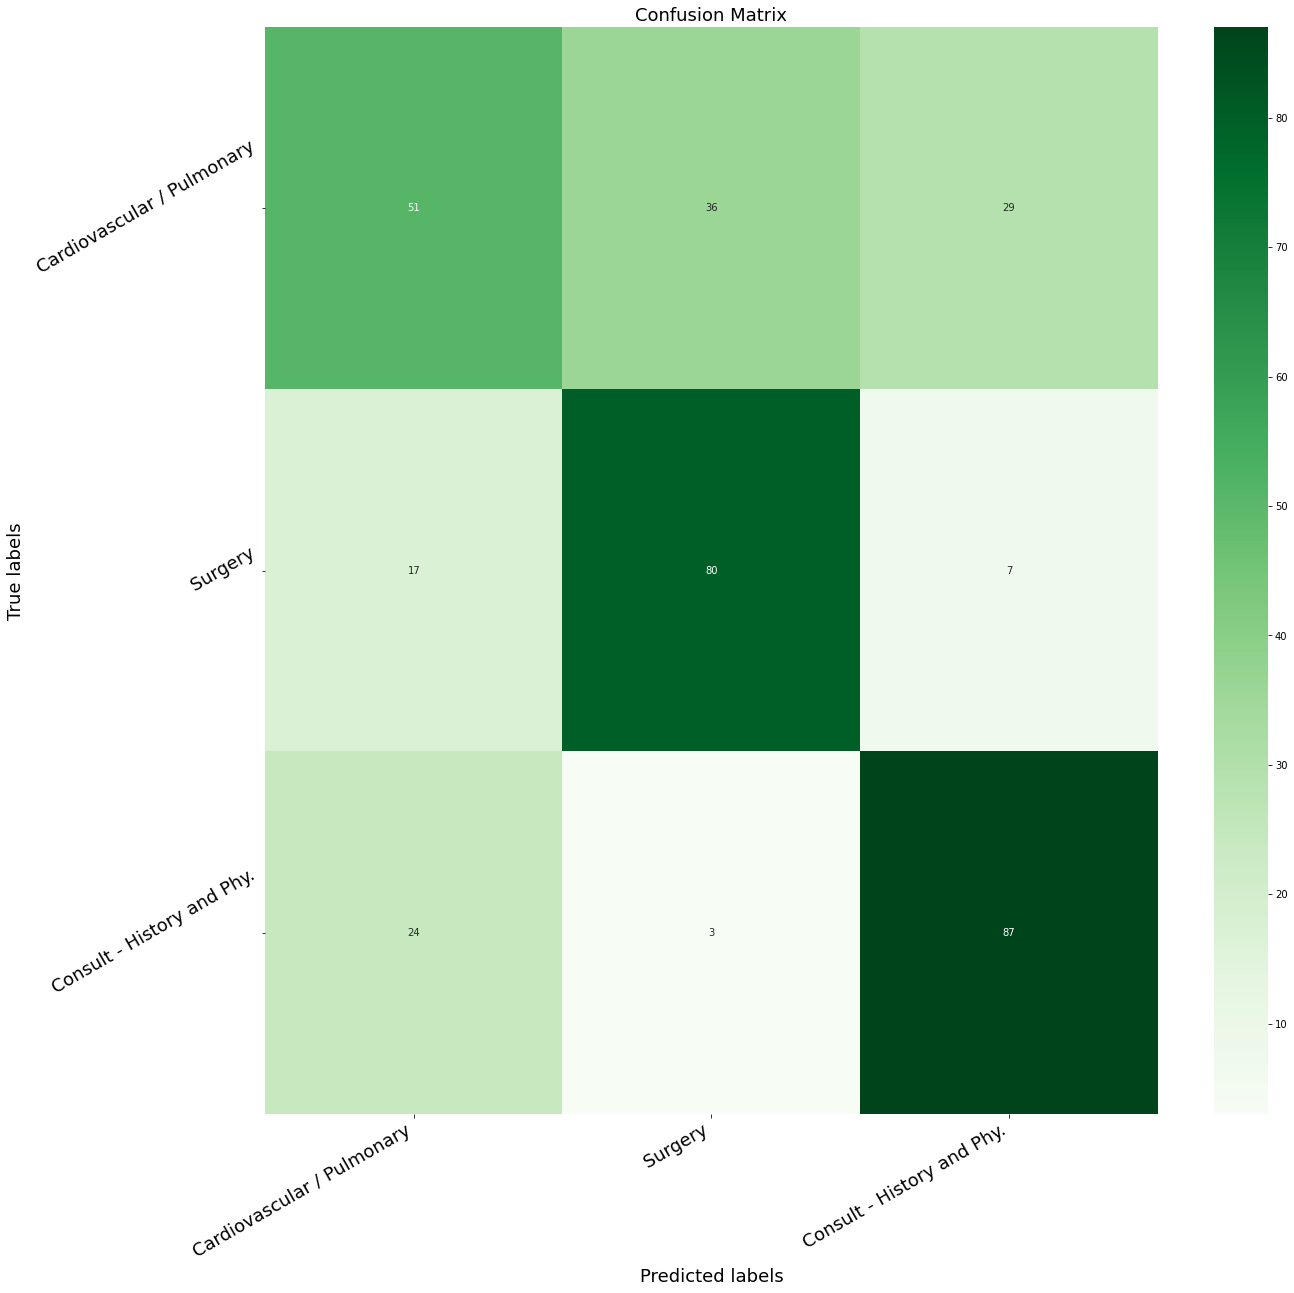

In [444]:
classes =  data['medical_specialty'].unique()
cm = confusion_matrix(y_test, y_pred4, labels=classes)
plot_confusion_matrix(cm, classes)

In [445]:
print(classification_report(y_test,y_pred4,labels=classes))

                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.55      0.44      0.49       116
                    Surgery       0.67      0.77      0.72       104
 Consult - History and Phy.       0.71      0.76      0.73       114

                   accuracy                           0.65       334
                  macro avg       0.64      0.66      0.65       334
               weighted avg       0.64      0.65      0.64       334



# Random Forest

In [446]:
rf_params =   {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
feat_cols = list(sfs1.k_feature_idx_)
y_pred1, model2 = train_random_forest(X_train[:, feat_cols], y_train, X_test[:, feat_cols], y_test, rf_params)

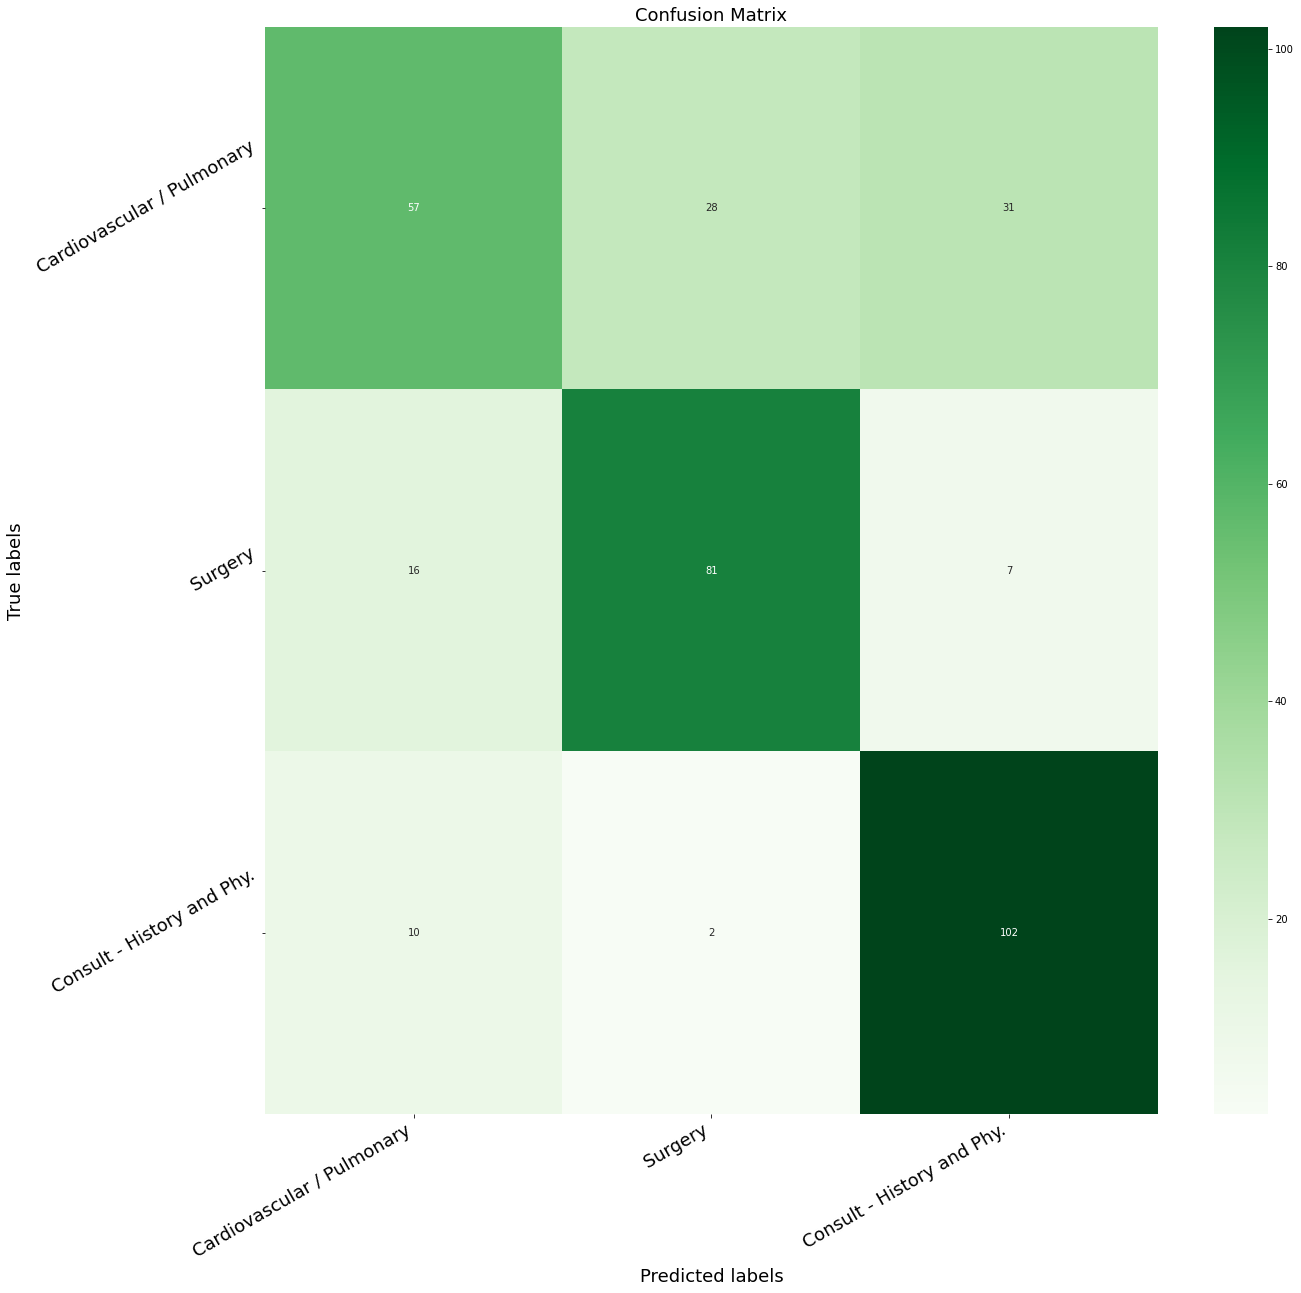

In [447]:
classes =  data['medical_specialty'].unique()
cm = confusion_matrix(y_test, y_pred1, labels=classes)
plot_confusion_matrix(cm, classes)

In [448]:
print(classification_report(y_test,y_pred1,labels=classes))

                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.69      0.49      0.57       116
                    Surgery       0.73      0.78      0.75       104
 Consult - History and Phy.       0.73      0.89      0.80       114

                   accuracy                           0.72       334
                  macro avg       0.72      0.72      0.71       334
               weighted avg       0.71      0.72      0.71       334



# CAT Boost

In [467]:
catboost_params = {'iterations': 1000, 'learning_rate': 0.1, 'depth': 6, 'loss_function': 'MultiClass'}
feat_cols = list(sfs1.k_feature_idx_)
y_pred3, model3 = train_catboost(X_train[:, feat_cols], y_train,  X_test[:, feat_cols], y_test, catboost_params)

0:	learn: 1.0303426	test: 1.0367144	best: 1.0367144 (0)	total: 5.36ms	remaining: 5.36s
100:	learn: 0.3977574	test: 0.5659553	best: 0.5625767 (91)	total: 178ms	remaining: 1.58s
200:	learn: 0.3412556	test: 0.5881486	best: 0.5625767 (91)	total: 340ms	remaining: 1.35s
300:	learn: 0.3082770	test: 0.6141707	best: 0.5625767 (91)	total: 503ms	remaining: 1.17s
400:	learn: 0.2860456	test: 0.6332201	best: 0.5625767 (91)	total: 662ms	remaining: 989ms
500:	learn: 0.2695292	test: 0.6500732	best: 0.5625767 (91)	total: 820ms	remaining: 817ms
600:	learn: 0.2568002	test: 0.6657452	best: 0.5625767 (91)	total: 982ms	remaining: 652ms
700:	learn: 0.2465003	test: 0.6802829	best: 0.5625767 (91)	total: 1.14s	remaining: 486ms
800:	learn: 0.2378426	test: 0.6924987	best: 0.5625767 (91)	total: 1.3s	remaining: 323ms
900:	learn: 0.2301192	test: 0.7070684	best: 0.5625767 (91)	total: 1.46s	remaining: 160ms
999:	learn: 0.2236941	test: 0.7182104	best: 0.5625767 (91)	total: 1.62s	remaining: 0us

bestTest = 0.5625767496
b

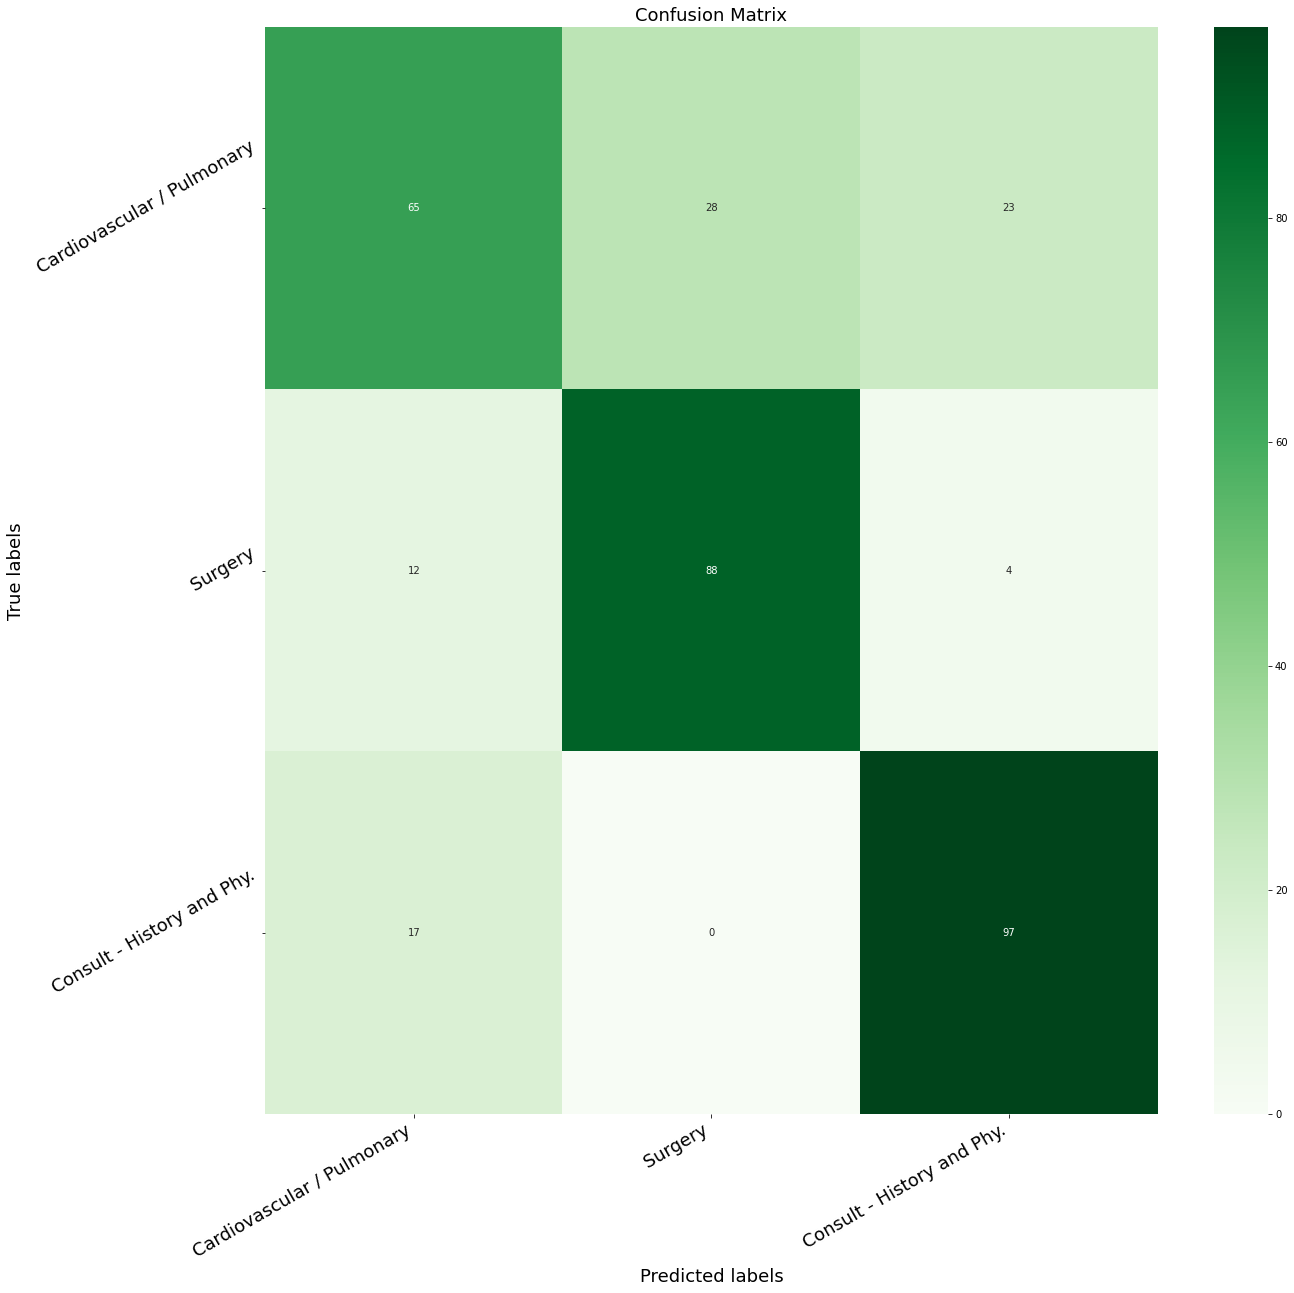

In [468]:
classes =  data['medical_specialty'].unique()
cm = confusion_matrix(y_test, y_pred3, labels=classes)
plot_confusion_matrix(cm, classes)

In [469]:
print(classification_report(y_test,y_pred3,labels=classes))

                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.69      0.56      0.62       116
                    Surgery       0.76      0.85      0.80       104
 Consult - History and Phy.       0.78      0.85      0.82       114

                   accuracy                           0.75       334
                  macro avg       0.74      0.75      0.74       334
               weighted avg       0.74      0.75      0.74       334



# Recoding feature means of Misclassified Examples in a dataframe and stpring it in an excel

In [69]:
misclassified = X_test[:, feat_cols][y_test != y_test_pred]

In [70]:
misclassified_df = pd.DataFrame(misclassified)

In [71]:
misclassified_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.000000,0.0,0.18346,0.0,0.000000,0.038282,0.000000,0.000000,0.000000,0.000000,0.071587,0.0,0.0,0.052142,0.0
1,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
2,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
3,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066913,0.0,0.0,0.000000,0.0
4,0.072683,0.0,0.00000,0.0,0.000000,0.000000,0.145018,0.046549,0.000000,0.034501,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,0.000000,0.0,0.00000,0.0,0.000000,0.049158,0.225114,0.000000,0.000000,0.053556,0.000000,0.0,0.0,0.000000,0.0
79,0.000000,0.0,0.00000,0.0,0.000000,0.042180,0.000000,0.000000,0.000000,0.000000,0.078876,0.0,0.0,0.000000,0.0
80,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.197694,0.000000,0.000000,0.000000,0.161456,0.0,0.0,0.000000,0.0
81,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.291249,0.0,0.0,0.127283,0.0


In [72]:
for feature in misclassified_df.columns:
    print("Mean of feature {} for misclassified examples: {:.2f}".format(feature, misclassified_df[feature].mean()))

Mean of feature 0 for misclassified examples: 0.01
Mean of feature 1 for misclassified examples: 0.00
Mean of feature 2 for misclassified examples: 0.01
Mean of feature 3 for misclassified examples: 0.01
Mean of feature 4 for misclassified examples: 0.00
Mean of feature 5 for misclassified examples: 0.03
Mean of feature 6 for misclassified examples: 0.01
Mean of feature 7 for misclassified examples: 0.01
Mean of feature 8 for misclassified examples: 0.01
Mean of feature 9 for misclassified examples: 0.01
Mean of feature 10 for misclassified examples: 0.06
Mean of feature 11 for misclassified examples: 0.01
Mean of feature 12 for misclassified examples: 0.01
Mean of feature 13 for misclassified examples: 0.01
Mean of feature 14 for misclassified examples: 0.00


In [73]:
# misclassified_df.to_excel('misclassification_dataframe.xlsx')

# Mapping actual values to their predicted values

In [74]:
y_prediction = y_test_pred.tolist()

In [75]:
actual_and_predited = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

In [76]:
actual_and_predited

,Actual,Predicted
0,Surgery,Cardiovascular / Pulmonary
1,Cardiovascular / Pulmonary,Consult - History and Phy.
2,Surgery,Surgery
3,Consult - History and Phy.,Consult - History and Phy.
4,Cardiovascular / Pulmonary,Consult - History and Phy.
...,...,...
329,Consult - History and Phy.,Consult - History and Phy.
330,Cardiovascular / Pulmonary,Surgery
331,Consult - History and Phy.,Consult - History and Phy.
332,Surgery,Surgery


In [77]:
# actual_and_predited.to_excel('actual_and_predited_dataframe.xlsx')

# Recoding feature means of Correctly classified Examples in a dataframe and storing it in an excel

In [78]:
correctly_classified = X_test[:, feat_cols][y_test == y_test_pred]

In [79]:
correct_df = pd.DataFrame(correctly_classified)

In [80]:
for feature in misclassified_df.columns:
    print("Mean of feature {} for correctly classified examples: {:.2f}".format(feature, correct_df[feature].mean()))

Mean of feature 0 for correctly classified examples: 0.02
Mean of feature 1 for correctly classified examples: 0.00
Mean of feature 2 for correctly classified examples: 0.01
Mean of feature 3 for correctly classified examples: 0.01
Mean of feature 4 for correctly classified examples: 0.01
Mean of feature 5 for correctly classified examples: 0.04
Mean of feature 6 for correctly classified examples: 0.01
Mean of feature 7 for correctly classified examples: 0.01
Mean of feature 8 for correctly classified examples: 0.01
Mean of feature 9 for correctly classified examples: 0.02
Mean of feature 10 for correctly classified examples: 0.04
Mean of feature 11 for correctly classified examples: 0.01
Mean of feature 12 for correctly classified examples: 0.01
Mean of feature 13 for correctly classified examples: 0.01
Mean of feature 14 for correctly classified examples: 0.00


In [81]:
correct_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.039992,0.0,0.0,0.0,0.000000
1,0.042901,0.0,0.0,0.185408,0.000000,0.037384,0.000000,0.054952,0.000000,0.040728,0.000000,0.0,0.0,0.0,0.069701
2,0.000000,0.0,0.0,0.000000,0.032206,0.000000,0.000000,0.000000,0.018768,0.000000,0.063556,0.0,0.0,0.0,0.000000
3,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.095335,0.000000,0.193705,0.0,0.0,0.0,0.000000
4,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.061193,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.036987,0.000000,0.050101,0.0,0.0,0.0,0.000000
247,0.000000,0.0,0.0,0.141777,0.000000,0.042879,0.065454,0.000000,0.000000,0.046716,0.000000,0.0,0.0,0.0,0.159896
248,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
249,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050878,0.0,0.0,0.0,0.000000


In [82]:
for feature in misclassified_df.columns:
    print("Number of outliers for feature {}: {}".format(feature, np.sum(np.abs(misclassified_df[feature] - misclassified_df[feature].mean()) > 3*misclassified_df[feature].std())))

Number of outliers for feature 0: 1
Number of outliers for feature 1: 0
Number of outliers for feature 2: 3
Number of outliers for feature 3: 3
Number of outliers for feature 4: 3
Number of outliers for feature 5: 3
Number of outliers for feature 6: 3
Number of outliers for feature 7: 2
Number of outliers for feature 8: 3
Number of outliers for feature 9: 1
Number of outliers for feature 10: 2
Number of outliers for feature 11: 2
Number of outliers for feature 12: 2
Number of outliers for feature 13: 3
Number of outliers for feature 14: 1


# Probability of a particular class being predicted 

In [83]:
probs = model.predict_proba(X_test[:, feat_cols])
probs_misclassified = probs[y_test != y_test_pred]

In [84]:
probs

array([[0.60673674, 0.13328916, 0.25997411],
       [0.2798449 , 0.38747198, 0.33268312],
       [0.2986216 , 0.28826147, 0.41311693],
       ...,
       [0.2798449 , 0.38747198, 0.33268312],
       [0.3015024 , 0.26382286, 0.43467474],
       [0.2251894 , 0.51706399, 0.25774661]])

In [85]:
probs_misclassified


array([[0.60673674, 0.13328916, 0.25997411],
       [0.2798449 , 0.38747198, 0.33268312],
       [0.2798449 , 0.38747198, 0.33268312],
       [0.30402134, 0.2302028 , 0.46577586],
       [0.31320363, 0.5415329 , 0.14526347],
       [0.24790047, 0.50489396, 0.24720557],
       [0.37247996, 0.36084505, 0.266675  ],
       [0.17207887, 0.01608532, 0.81183581],
       [0.2798449 , 0.38747198, 0.33268312],
       [0.30302982, 0.16885604, 0.52811414],
       [0.30368434, 0.23659643, 0.45971923],
       [0.31109269, 0.23720938, 0.45169793],
       [0.20921112, 0.39525273, 0.39553614],
       [0.38251464, 0.15489371, 0.46259165],
       [0.33395656, 0.17267686, 0.49336657],
       [0.51912719, 0.2480666 , 0.23280621],
       [0.4759856 , 0.18402103, 0.33999337],
       [0.26771582, 0.06328551, 0.66899867],
       [0.29186432, 0.11107489, 0.59706078],
       [0.47714347, 0.28356433, 0.2392922 ],
       [0.2798449 , 0.38747198, 0.33268312],
       [0.28937801, 0.38823586, 0.32238612],
       [0.

In [86]:
prob_df = pd.DataFrame(probs)

In [87]:
prob_df

,0,1,2
0,0.606737,0.133289,0.259974
1,0.279845,0.387472,0.332683
2,0.298622,0.288261,0.413117
3,0.278640,0.582727,0.138633
4,0.279845,0.387472,0.332683
...,...,...,...
329,0.349040,0.507018,0.143942
330,0.365457,0.101293,0.533250
331,0.279845,0.387472,0.332683
332,0.301502,0.263823,0.434675


# Converting X_test to its original text to map the transcriptions with the records 

In [88]:
original_text = vectorizer.inverse_transform(X_test)

In [89]:
original_df = pd.DataFrame({'text_column': [' '.join(text) for text in original_text]})

In [90]:
original_df

,text_column
0,abnormalities abuse addition alcohol angiogram...
1,abdomen abnormalities activity aspirin beats b...
2,access anesthesia approach areas bed bone brai...
3,abdomen age allergies anxiety assessment auscu...
4,angioplasty carotid evidence months neurologic...
...,...
329,abdomen abdominal abnormality affect air airwa...
330,anastomosis anesthesia aorta apex aspect atria...
331,arm aspirin brain chemotherapy condition day d...
332,anesthesia arm blade blood blunt care cautery ...


In [91]:
original_list = original_df['text_column'].tolist()

# Token Count of the transcriptions

In [92]:
# Initialize an empty list to store the token counts
token_counts = []

# Loop over each text and tokenize it
for text in original_list:
    tokens = nltk.word_tokenize(text)
    
    # Count the number of tokens in the text and append to the list
    token_count = len(tokens)
    token_counts.append(token_count)

# Print the token counts for each text
# for i, count in enumerate(token_counts):
#     print("Text", i+1, "token count:", count)

In [93]:
token_counts

[69,
 41,
 51,
 128,
 13,
 99,
 31,
 32,
 139,
 44,
 96,
 72,
 34,
 31,
 103,
 81,
 61,
 35,
 20,
 109,
 33,
 77,
 79,
 18,
 54,
 95,
 48,
 39,
 69,
 140,
 28,
 76,
 55,
 103,
 69,
 124,
 46,
 56,
 43,
 125,
 60,
 65,
 56,
 34,
 130,
 66,
 85,
 86,
 25,
 70,
 23,
 43,
 93,
 138,
 64,
 89,
 35,
 43,
 75,
 88,
 53,
 59,
 94,
 40,
 97,
 159,
 40,
 78,
 22,
 81,
 33,
 85,
 8,
 97,
 80,
 77,
 44,
 71,
 133,
 70,
 95,
 52,
 48,
 48,
 81,
 85,
 51,
 30,
 167,
 19,
 40,
 47,
 94,
 44,
 68,
 109,
 37,
 64,
 70,
 123,
 50,
 104,
 123,
 60,
 61,
 83,
 105,
 95,
 79,
 44,
 36,
 139,
 76,
 34,
 8,
 136,
 70,
 93,
 161,
 64,
 45,
 89,
 74,
 43,
 53,
 44,
 58,
 35,
 75,
 75,
 130,
 49,
 25,
 109,
 64,
 86,
 55,
 59,
 57,
 65,
 79,
 49,
 162,
 31,
 54,
 53,
 77,
 28,
 74,
 65,
 70,
 26,
 67,
 32,
 50,
 77,
 66,
 56,
 28,
 37,
 85,
 107,
 73,
 33,
 118,
 62,
 108,
 64,
 61,
 64,
 56,
 43,
 29,
 38,
 95,
 62,
 69,
 75,
 13,
 43,
 55,
 79,
 89,
 75,
 20,
 60,
 13,
 29,
 56,
 33,
 39,
 119,
 58,
 105,
 87

In [94]:
token_df = pd.DataFrame(token_counts, columns=['Count'])

In [95]:
token_df

,Count
0,69
1,41
2,51
3,128
4,13
...,...
329,95
330,99
331,42
332,53


# Mapping the transcription with its token count

In [96]:
transcription_token_df = pd.concat([original_df,token_df],axis=1)

In [97]:
transcription_token_df

,text_column,Count
0,abnormalities abuse addition alcohol angiogram...,69
1,abdomen abnormalities activity aspirin beats b...,41
2,access anesthesia approach areas bed bone brai...,51
3,abdomen age allergies anxiety assessment auscu...,128
4,angioplasty carotid evidence months neurologic...,13
...,...,...
329,abdomen abdominal abnormality affect air airwa...,95
330,anastomosis anesthesia aorta apex aspect atria...,99
331,arm aspirin brain chemotherapy condition day d...,42
332,anesthesia arm blade blood blunt care cautery ...,53


# Concatenating the actual and predicted values with the probabilities corresponding to their transcription and their token count respectively 

In [98]:
final_df = pd.concat([actual_and_predited,prob_df,transcription_token_df],axis=1)

In [99]:
final_df

,Actual,Predicted,0,1,2,text_column,Count
0,Surgery,Cardiovascular / Pulmonary,0.606737,0.133289,0.259974,abnormalities abuse addition alcohol angiogram...,69
1,Cardiovascular / Pulmonary,Consult - History and Phy.,0.279845,0.387472,0.332683,abdomen abnormalities activity aspirin beats b...,41
2,Surgery,Surgery,0.298622,0.288261,0.413117,access anesthesia approach areas bed bone brai...,51
3,Consult - History and Phy.,Consult - History and Phy.,0.278640,0.582727,0.138633,abdomen age allergies anxiety assessment auscu...,128
4,Cardiovascular / Pulmonary,Consult - History and Phy.,0.279845,0.387472,0.332683,angioplasty carotid evidence months neurologic...,13
...,...,...,...,...,...,...,...
329,Consult - History and Phy.,Consult - History and Phy.,0.349040,0.507018,0.143942,abdomen abdominal abnormality affect air airwa...,95
330,Cardiovascular / Pulmonary,Surgery,0.365457,0.101293,0.533250,anastomosis anesthesia aorta apex aspect atria...,99
331,Consult - History and Phy.,Consult - History and Phy.,0.279845,0.387472,0.332683,arm aspirin brain chemotherapy condition day d...,42
332,Surgery,Surgery,0.301502,0.263823,0.434675,anesthesia arm blade blood blunt care cautery ...,53
